In [3]:
import os
import numpy as np  
import pandas as pd

# Question :1

Read and explore the given dataset. ( Rename column/add headers, plot histograms, find data characteristics)

In [4]:
ratings_data = pd.read_csv("ratings_Electronics.csv",names=["userId", "productId", "ratings","Timestamp"])  
ratings_data.head()

,userId,productId,ratings,Timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [5]:
ratings_data.info() ## Listing datatype of columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   ratings    float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [6]:
ratings_data.shape ## total of 7824482 rows and 4 Columns 

(7824482, 4)

In [7]:
##Checking Null values.
ratings_data.isnull().values.any()  ## No null values in the input data

False

In [8]:
## checking number of records and with their ratings:1-5 percentages in entire data set.
n_1 = len(ratings_data.loc[ratings_data['ratings'] == 1])
n_2 = len(ratings_data.loc[ratings_data['ratings'] == 2])
n_3 = len(ratings_data.loc[ratings_data['ratings'] == 3])
n_4 = len(ratings_data.loc[ratings_data['ratings'] == 4])
n_5 = len(ratings_data.loc[ratings_data['ratings'] == 5])

print("Number of products with 1 as rating : {0} ({1:2.2f}%)".format(n_1, (n_1 / (n_1 + n_2 + n_3 +n_4 + n_5)) * 100 ))
print("Number of products with 2 as rating : {0} ({1:2.2f}%)".format(n_2, (n_2 / (n_1 + n_2 + n_3 +n_4 + n_5)) * 100 ))
print("Number of products with 3 as rating : {0} ({1:2.2f}%)".format(n_3, (n_3 / (n_1 + n_2 + n_3 +n_4 + n_5)) * 100 ))
print("Number of products with 4 as rating : {0} ({1:2.2f}%)".format(n_4, (n_4 / (n_1 + n_2 + n_3 +n_4 + n_5)) * 100 ))
print("Number of products with 5 as rating : {0} ({1:2.2f}%)".format(n_5, (n_5 / (n_1 + n_2 + n_3 +n_4 + n_5)) * 100 ))

Number of products with 1 as rating : 901765 (11.52%)
Number of products with 2 as rating : 456322 (5.83%)
Number of products with 3 as rating : 633073 (8.09%)
Number of products with 4 as rating : 1485781 (18.99%)
Number of products with 5 as rating : 4347541 (55.56%)


In [9]:
#As per the above stats, most of the products are rated as 5 and  55.56 % of total records are with 5 as rating.

In [10]:
ratings_df=ratings_data.drop(['Timestamp'], axis=1) ## As per data description dropping Timestamp column 

In [11]:
ratings_df.head(10) #Dipalying 10 rows 

,userId,productId,ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0
5,A1QGNMC6O1VW39,0511189877,5.0
6,A3J3BRHTDRFJ2G,0511189877,2.0
7,A2TY0BTJOTENPG,0511189877,5.0
8,A34ATBPOK6HCHY,0511189877,5.0
9,A89DO69P0XZ27,0511189877,5.0


In [12]:
#5 point summary of numerical attributes.
ratings_df.describe().transpose() # Here ratings' Data is skewed. 

,count,mean,std,min,25%,50%,75%,max
ratings,7824482.0,4.012337,1.38091,1.0,3.0,5.0,5.0,5.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A68BC8DB88>]],
      dtype=object)

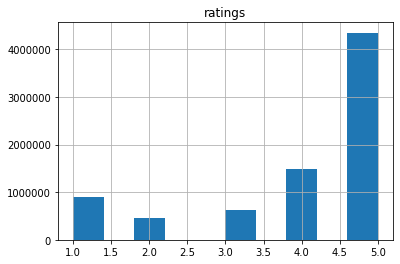

In [13]:
#Plotting histogram to check the distribution of data
ratings_df.hist()

In [14]:
ratings_df.skew()

ratings   -1.205397
dtype: float64

C:\Users\91888\anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\Users\91888\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


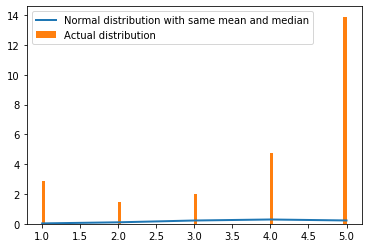

In [15]:
## for ratings::
#convert pandas DataFrame object to numpy array and sort

import matplotlib.pyplot as plt
import scipy.stats as stats

h = np.asarray(ratings_df['ratings'])
h = sorted(h)
 
#use the scipy stats module 
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and median")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

In [97]:
#ratings_df.groupby('productId')['ratings'].mean().head(10) 

In [98]:
##ratings_df.groupby('productId')['ratings'].mean().sort_values(ascending=False).head()  

In [99]:
#ratings_df.groupby('productId')['ratings'].count().sort_values(ascending=False).head() 

# Question:2
Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings ) 

In [19]:
v = ratings_df['userId'].value_counts()

In [20]:
v

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
                 ... 
A2L5RJSV0605S0      1
A1YUVIOL7XC4GJ      1
A26SSRTS5QOVWM      1
A1BE63ZB813ECH      1
A2WNNG76PC9EKC      1
Name: userId, Length: 4201696, dtype: int64

In [21]:
#Taking the users only who have given 50 or more number of ratings.
df_ratings=ratings_df[ratings_df['userId'].isin(v.index[v.gt(49)])]

In [22]:
df_ratings.head(10)

,userId,productId,ratings
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0
631,A3TAS1AG6FMBQW,0972683275,5.0
1003,A2Y4H3PXB07WQI,0972683275,4.0
1138,A25RTRAPQAJBDJ,0972683275,5.0
1310,A3LDPF5FMB782Z,1400501466,5.0
1322,A1A5KUIIIHFF4U,1400501466,1.0


In [23]:
df_ratings.shape ## Filtered data with users who have givien more than  or equal to 50 reviews

(125871, 3)

In [24]:
ratings_data.shape ## Input data without any filtration 

(7824482, 4)

In [25]:
#Here Data filtered from 7824482 to 125871 records to make it less sparse/ denser.

# Question:3
Build Popularity Recommender model.

In [26]:
df_ratings.groupby('productId')['ratings'].mean().head()  

productId
0594451647    5.000000
0594481813    3.000000
0970407998    2.500000
0972683275    4.750000
1400501466    3.333333
Name: ratings, dtype: float64

In [27]:
#Taking the mean of ratings and displaying in descending order
df_ratings.groupby('productId')['ratings'].mean().sort_values(ascending=False).head()  

productId
B00LKG1MC8    5.0
B002QUZM3M    5.0
B002QWNZHU    5.0
B002QXZPFE    5.0
B002R0DWNS    5.0
Name: ratings, dtype: float64

In [28]:
#Here we can recommend these top products as recommendations.

In [29]:
##But Products that displayed top in rating wise and products that displayed with a number that with the highest ratings are different.
df_ratings.groupby('productId')['ratings'].count().sort_values(ascending=False).head()  


productId
B0088CJT4U    206
B003ES5ZUU    184
B000N99BBC    167
B007WTAJTO    164
B00829TIEK    149
Name: ratings, dtype: int64

In [30]:
ratings_mean_count = pd.DataFrame(df_ratings.groupby('productId')['ratings'].mean()) 
ratings_mean_count

,ratings
productId,
0594451647,5.000000
0594481813,3.000000
0970407998,2.500000
0972683275,4.750000
1400501466,3.333333
...,...
B00LED02VY,4.000000
B00LGN7Y3G,5.000000
B00LGQ6HL8,5.000000


In [31]:
ratings_mean_count['rating_counts'] = pd.DataFrame(df_ratings.groupby('productId')['ratings'].count())  

In [33]:
#Displaying in one dataframe with product ratings and rating counts
ratings_mean_count.head()

,ratings,rating_counts
productId,,
0594451647,5.000000,1
0594481813,3.000000,1
0970407998,2.500000,2
0972683275,4.750000,4
1400501466,3.333333,6


In [34]:
##Here we clearly can identify that productId:0594451647 has the highest rating but it was rated by only one user whereas productId:1400501466 is rated as 3.333 even though it was rated by 6 users.
#So here alone popularity based is not a personalized recommendation to one's individual but it is common to all in terms of recommendations.

##popularity based recommendation has certain limitations such as products may come in top of the recommendation even though that specific product was rated by less number of users

##Here, because of these cases we can sometimes implement customizations that might come under Hybrid recommendation

# Question:4
Split the data randomly into a train and test dataset. ( For example, split it in70/30 ratio)

In [35]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split


In [36]:
Clb_ratings_data = pd.read_csv("ratings_Electronics.csv",names=["uid", "iid", "raw_ratings","Timestamp"])  
Clb_ratings_data.head()

,uid,iid,raw_ratings,Timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [41]:
clb_ratings_df=Clb_ratings_data.drop(['Timestamp'], axis=1) ## As per data description dropping Timestamp column

clb_v = clb_ratings_df['uid'].value_counts()

df_ratings_clb_filtered=clb_ratings_df[clb_ratings_df['uid'].isin(clb_v.index[clb_v.gt(100)])]

In [170]:
##Here filtering first 5000 records. 
#Because giving memory issues while loading all records (or) users records who have given 50 or an equal number of reviews for products.  

In [196]:
df_ratings_clb=df_ratings_clb_filtered.head(5000) 
df_ratings_clb

,uid,iid,raw_ratings
118,AT09WGFUM934H,0594481813,3.0
178,A17HMM1M7T9PJ1,0970407998,4.0
631,A3TAS1AG6FMBQW,0972683275,5.0
1777,A18S2VGUH9SCV5,1400501776,4.0
2162,A5JLAU2ARJ0BO,1400532655,1.0
...,...,...,...
633997,A2JE071UW97J2A,B0007Y794O,5.0
634037,ARX7Z3NI6O0F7,B0007Y794O,4.0
634257,A3T4OHEAHOJ700,B0007Y7976,2.0
634362,A1JUBRIZMO0RJV,B0007Y7976,5.0


In [197]:
df_ratings_clb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 118 to 634435
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uid          5000 non-null   object 
 1   iid          5000 non-null   object 
 2   raw_ratings  5000 non-null   float64
dtypes: float64(1), object(2)
memory usage: 156.2+ KB


In [198]:
from surprise import Reader
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_ratings_clb[['uid','iid','raw_ratings']] ,reader=reader)
trainset, testset = train_test_split(data, test_size=.30, random_state=2)

In [199]:
## Taking Trian Test split with ratio of 70:30

# Question: 5
Build Collaborative Filtering model

In [200]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
##Building with KNNWithMeans and  pearson_baseline as the similarity measure
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})


In [201]:
#fitting training dataset to Algothrim

algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [202]:
# prediction using the testset
test_pred_usr = algo.test(testset)

In [203]:
test_pred_usr

[Prediction(uid='A680RUE1FDO8B', iid='B0000D898Q', r_ui=5.0, est=4.248571428571428, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1EH2S92FHWZRP', iid='B00006SG3V', r_ui=2.0, est=4.248571428571428, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A27QXQQOLAMRRR', iid='B00005NIMJ', r_ui=5.0, est=4.5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A33HIV8RXRDM88', iid='B00007EDZG', r_ui=4.0, est=5, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A2PSD2R9A1CXG7', iid='B0000CD0B7', r_ui=5.0, est=4.2727272727272725, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A203OCQQ12MAVT', iid='B00006JPD1', r_ui=5.0, est=4.248571428571428, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='ARBKYIVNYWK3C', iid='B0002WPREU', r_ui=5.0, est=4.823529411764706, details={'actual_k': 0, 'was_impossible': False}),
 Pre

In [204]:
# get RMSE
print("User-based Model-RMSE: Test Set")
accuracy.rmse(test_pred_usr, verbose=True)

User-based Model-RMSE: Test Set
RMSE: 1.1525


1.1525290014896845

In [205]:
# get MSE
print("User-based Model-MSE: Test Set")
accuracy.mse(test_pred_usr, verbose=True)

User-based Model-MSE: Test Set
MSE: 1.3283


1.328323099274809

In [206]:
algo2 = KNNWithMeans(k=50, sim_options={'name': 'cosine', 'user_based': True})
algo2.fit(trainset)
test_pred_item2 = algo2.test(testset)
# get RMSE
print("User-based Model-RMSE: Test Set")
accuracy.rmse(test_pred_usr, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
User-based Model-RMSE: Test Set
RMSE: 1.1525


1.1525290014896845

In [207]:
# get RMSE
print("User-based Model-MSE: Test Set")
accuracy.mse(test_pred_usr, verbose=True)

User-based Model-MSE: Test Set
MSE: 1.3283


1.328323099274809

In [208]:
# switching item-based collaborative filtering by making 'user_based': False'
algo1 = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})

In [209]:
algo1.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [210]:
test_pred_item = algo1.test(testset)

In [211]:
test_pred_item

[Prediction(uid='A680RUE1FDO8B', iid='B0000D898Q', r_ui=5.0, est=4.248571428571428, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1EH2S92FHWZRP', iid='B00006SG3V', r_ui=2.0, est=4.248571428571428, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A27QXQQOLAMRRR', iid='B00005NIMJ', r_ui=5.0, est=5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A33HIV8RXRDM88', iid='B00007EDZG', r_ui=4.0, est=4.7, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A2PSD2R9A1CXG7', iid='B0000CD0B7', r_ui=5.0, est=5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A203OCQQ12MAVT', iid='B00006JPD1', r_ui=5.0, est=4.248571428571428, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='ARBKYIVNYWK3C', iid='B0002WPREU', r_ui=5.0, est=4.666666666666667, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A213

In [212]:
# get RMSE
print("Item-based Model-RMSE : Test Set")
accuracy.rmse(test_pred_item, verbose=True)

Item-based Model-RMSE : Test Set
RMSE: 1.2119


1.2119408475690838

In [213]:
print("Item-based Model-RMSE : Test Set")
accuracy.mse(test_pred_item, verbose=True)

Item-based Model-RMSE : Test Set
MSE: 1.4688


1.4688006180064694

# Question : 7
Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products. 


In [214]:
from collections import defaultdict
def get_top_n(predictions, k=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:k]

    return top_n

In [215]:
top_n_item_based = get_top_n(test_pred_item, k=5)  ## For Item-based recomdenation

In [216]:
top_n_usr_based = get_top_n(test_pred_usr, k=5)  ## For User-based recomdenation

In [217]:
top_n_item_based

defaultdict(list,
            {'A680RUE1FDO8B': [('B0000D898Q', 4.248571428571428),
              ('B0007THIDQ', 4.248571428571428),
              ('B0000AJ3MV', 4.248571428571428),
              ('B0002J3PTC', 4.248571428571428),
              ('B000001OMI', 4.248571428571428)],
             'A1EH2S92FHWZRP': [('B00007EDZG', 4.5),
              ('B00009W3TY', 4.333333333333333),
              ('B00006SG3V', 4.248571428571428),
              ('B00000J4FS', 4.248571428571428),
              ('B00003CWDO', 4.248571428571428)],
             'A27QXQQOLAMRRR': [('B00005NIMJ', 5)],
             'A33HIV8RXRDM88': [('B00004ZCKV', 5),
              ('B0000BZL1P', 5),
              ('B00007EDZG', 4.7),
              ('B00008IHU2', 4.5),
              ('B0000E2PMA', 4.248571428571428)],
             'A2PSD2R9A1CXG7': [('B0000CD0B7', 5),
              ('B0000C4G78', 5),
              ('B00007E7K1', 5),
              ('B00009R6V0', 5),
              ('B0007G6RZE', 5)],
             'A203OCQQ12MAVT'

In [218]:
top_n_usr_based

defaultdict(list,
            {'A680RUE1FDO8B': [('B0000D898Q', 4.248571428571428),
              ('B0007THIDQ', 4.248571428571428),
              ('B0000AJ3MV', 4.248571428571428),
              ('B0002J3PTC', 4.248571428571428),
              ('B000001OMI', 4.248571428571428)],
             'A1EH2S92FHWZRP': [('B0001IXUDK', 4.538461538461538),
              ('B0006BKH3S', 4.538461538461538),
              ('B00009UT3F', 4.538461538461538),
              ('B00009W3TY', 4.538461538461538),
              ('B00007EDZG', 4.538461538461538)],
             'A27QXQQOLAMRRR': [('B00005NIMJ', 4.5)],
             'A33HIV8RXRDM88': [('B00007EDZG', 5),
              ('B00004ZCKV', 4.583333333333333),
              ('B00006346W', 4.583333333333333),
              ('B0000BZL1P', 4.583333333333333),
              ('B00008IHU2', 4.583333333333333)],
             'A2PSD2R9A1CXG7': [('B0000CD0B7', 4.2727272727272725),
              ('B0000C4G78', 4.2727272727272725),
              ('B00009R6UI', 4.2727

In [219]:
# Print the recommended items for each user: based on User-based recommendation
for uid, user_ratings in top_n_usr_based.items():
    print(uid, [iid for (iid, _) in user_ratings])

A680RUE1FDO8B ['B0000D898Q', 'B0007THIDQ', 'B0000AJ3MV', 'B0002J3PTC', 'B000001OMI']
A1EH2S92FHWZRP ['B0001IXUDK', 'B0006BKH3S', 'B00009UT3F', 'B00009W3TY', 'B00007EDZG']
A27QXQQOLAMRRR ['B00005NIMJ']
A33HIV8RXRDM88 ['B00007EDZG', 'B00004ZCKV', 'B00006346W', 'B0000BZL1P', 'B00008IHU2']
A2PSD2R9A1CXG7 ['B0000CD0B7', 'B0000C4G78', 'B00009R6UI', 'B00007E7K1', 'B00006I53X']
A203OCQQ12MAVT ['B00004W3ZQ', 'B000068OEO', 'B0002MQGOK', 'B00006JPD1', 'B0000ET9DG']
ARBKYIVNYWK3C ['B0002WPREU', 'B00007IFED', 'B0002WPSB2', 'B0006I1TRY', 'B0000642RX']
A213J54E63SYOP ['B00011KLSO', 'B000069E1V', 'B0006DPMU4', 'B0002GRUV4']
A2AY4YUOX2N1BQ ['B00007GQLU', 'B00009R7ZL', 'B00007GQLT', 'B00009R7BD', 'B00005V8R8']
A4WEZJOIZIV4U ['B0001G6U4S', 'B00004WCIC', 'B00019OWU4', 'B00008XPAR', 'B0007XXU3E']
A25HBO5V8S8SEA ['B00007KDVI', 'B00005AC8J', 'B0001CNMFM', 'B0001A06GW', 'B00005145S']
A3EZFFPVS34AMO ['B00009R6WT', 'B0001VWHT0', 'B00026WRFI', 'B000138VFW']
AI8EMB0HUC6Z5 ['B00006RVPW', 'B0007TY0CI', 'B00030097G'

In [220]:
# Print the recommended items for each user: based on Item-based recommendation
for uid, user_ratings in top_n_item_based.items():
    print(uid, [iid for (iid, _) in user_ratings])

A680RUE1FDO8B ['B0000D898Q', 'B0007THIDQ', 'B0000AJ3MV', 'B0002J3PTC', 'B000001OMI']
A1EH2S92FHWZRP ['B00007EDZG', 'B00009W3TY', 'B00006SG3V', 'B00000J4FS', 'B00003CWDO']
A27QXQQOLAMRRR ['B00005NIMJ']
A33HIV8RXRDM88 ['B00004ZCKV', 'B0000BZL1P', 'B00007EDZG', 'B00008IHU2', 'B0000E2PMA']
A2PSD2R9A1CXG7 ['B0000CD0B7', 'B0000C4G78', 'B00007E7K1', 'B00009R6V0', 'B0007G6RZE']
A203OCQQ12MAVT ['B00004W3ZQ', 'B000068OEO', 'B00006JPD1', 'B0000ET9DG', 'B0000UH6LQ']
ARBKYIVNYWK3C ['B000067RT6', 'B0002WPREU', 'B0006I1TRY', 'B00009PGSW', 'B0002DODYO']
A213J54E63SYOP ['B0002GRUV4', 'B00011KLSO', 'B000069E1V', 'B0006DPMU4']
A2AY4YUOX2N1BQ ['B00009R7ZL', 'B00007GQLU', 'B00009R7BD', 'B00005V8R8', 'B000234I5I']
A4WEZJOIZIV4U ['B0001G6U4S', 'B00019OWU4', 'B000053HH5', 'B00004XOM3', 'B00009XVCZ']
A25HBO5V8S8SEA ['B0001CNMFM', 'B0001A06GW', 'B00005145S', 'B000068CS0', 'B00004Z8HN']
A3EZFFPVS34AMO ['B0001VWHT0', 'B000138VFW', 'B00009R6WT', 'B00026WRFI']
AI8EMB0HUC6Z5 ['B00006RVPW', 'B0007TY0CI', 'B00030097G'

# Question :8
Summarise your insights

About Popularity based Recommendation Model.

For popularity-based model we clearly can identify that productId:0594451647 has the highest rating but it was rated by only one user whereas productId:1400501466 is rated as 3.333 even though it was rated by 6 users.
So here alone popularity based is not a personalized recommendation to one's individual but it is common to all in terms of recommendations.

popularity based recommendation has certain limitations such as products may come in top of the recommendation even though that specific product was rated by less number of users

Here, because of these cases we can sometimes implement customizations that might come under Hybrid recommendation
But Popularity based model could avoid cold start problems.

About Collaborative Filtering mode:

Collaborative Filtering with user-user recommendation type and item-item recommendation.
For user-user type RMSE=1.525 MSE=1.3283
For item-item type RMSE=1.211 MSE=1.4688
In both of the above cases, RMSE and MSE are higher.
In both types, user-user and item-item recommendation types, both given an almost same score for different similarity types such as pearson_baseline and cosine similarity.
Because input data might be the cause for higher RMSE and MSE.
Here due to memory issues, while fitting training set to Algorithm, considered only a few user's data as per input data recommendation suggested in the problem statement.
And moreover these 5000 rows; users only who have given 50 or more ratings. 

While building user-based and item-based recommendations in collaborative filtering, we could observe a few parameters and their values.


Example : id='AYB4ELCS5AM8P', iid='B00004TY7F', r_ui=5.0, est=4.188571428571429, details={'was_impossible': True, 'reason': 'User and/or item is unkown.
Here 'was_impossible' is set True whenever the user has no similar items to search for among the nearest neighbors or he/she is a new user with no rating that he provided till the now.
Here as_impossible could set to True in both cases 1: Cold start and Gray sheep issues. And r_ui= actual user giving ratting, est=estimated ratting by Algorithm.                                                                                          

